In [1]:
import os 
import cv2 
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np 
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, roc_auc_score, RocCurveDisplay, classification_report
import pandas as pd
from predict import predict

1/1 [==============================] - 5s 5s/step
<class 'dict'>


In [18]:
# prepare our data 
test_path = os.path.join("test")
test_generator_object = ImageDataGenerator(rescale=1/255)
test_generator = test_generator_object.flow_from_directory(test_path, shuffle=True) # keep the default values 

Found 1000 images belonging to 4 classes.


1/1 [==============================] - 0s 167ms/step
[0, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 3, 1, 2, 3, 2, 3, 2, 3, 2, 2, 0, 3, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 3, 2, 3, 0, 2, 2, 3, 3, 1, 0, 3, 1, 3, 1, 2, 3, 0, 1, 2, 1, 3, 0, 2, 2, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 3, 2, 1, 0, 3, 3, 1, 3, 3, 2, 3, 1, 1, 2, 1, 2, 3, 3, 0, 3, 2, 2, 3, 2, 2, 1, 0, 1, 1, 3, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 3, 2, 3, 0, 2, 0, 0, 2, 3, 1, 1, 0, 1, 1, 3, 0, 2, 2, 2, 0, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 2, 0, 3, 1, 3, 2, 1, 3, 0, 2, 2, 0, 1, 2, 0, 1, 3, 2, 0, 3, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 3, 2, 3, 3, 2, 2, 0, 2, 1, 1, 3, 1, 2, 2, 1, 2, 1, 0, 3, 0, 1, 3, 2, 1, 1, 2, 0, 0, 3, 1, 3, 3, 3, 2, 2, 1, 3, 3, 0, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 0, 3, 1, 0, 3, 1, 0, 2, 0, 3, 0, 2, 2, 1, 0, 2, 2, 3, 0, 2, 0, 3, 1, 1, 3, 1, 2, 3, 0, 3, 1, 2, 1, 3, 2, 0, 1, 3, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 3, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 3, 3, 1, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 0, 2, 0, 3, 1, 1, 3, 1, 1, 0, 2, 0, 3, 3, 3

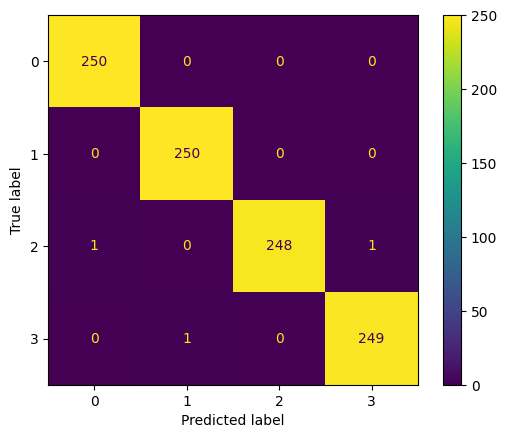

In [19]:
all_actual_y = []
all_predicted_y = []

for i in range(len(test_generator)): 
   
    # batch 
    images, actual_y = test_generator[i]
    
    # reformate the actual_y --> array of values --> convert the one hot encoder to simple values 
    actual_indeces = np.where(actual_y == 1)[1]
    
    # convert array to list 
    actual_indeces_list = actual_indeces.tolist()
    
    # loop in the list and put values in another list ouside the loop 
    for i in actual_indeces_list:
        all_actual_y.append(i)

    # load the saved trianed model 
    model = load_model(os.path.join('models','model_vgg16_unbalanced.h5'))
    
    # predict process 
    predicted_y = model.predict(images)
    
    # loop for the predicted output
    for i in predicted_y: # here is the array of probability --> [0.1, 0.1, 0.9, 0.3]
        if i.max() == i[0]:
            all_predicted_y.append(0)
        elif i.max() == i[1]:
            all_predicted_y.append(1)
        elif i.max() == i[2]:
            all_predicted_y.append(2)
        else:
            all_predicted_y.append(3)

            
############################################################################################    
# print values 
print(all_actual_y)
print(all_predicted_y)

# 1000 index for each image in the test dataset
print(len(all_actual_y))   
print(len(all_predicted_y))

# confusion matrix array  
confusion_matrix_result = confusion_matrix(all_actual_y, all_predicted_y)
print("confusion_matrix_result -->", confusion_matrix_result)

# balanced accuracy score  
balanced_accuracy = balanced_accuracy_score(all_actual_y, all_predicted_y)
print("balanced_accuracy -->", balanced_accuracy)

# accuracy  
accuracy = accuracy_score(all_actual_y, all_predicted_y)
print("accuracy -->", accuracy)

# precision
precision = precision_score(all_actual_y, all_predicted_y, average='micro')
print("precision -->", precision)

# recall 
recall = recall_score(all_actual_y, all_predicted_y, average='micro')
print("recall -->", recall)

# f1-score 
f1_score_result = f1_score(all_actual_y, all_predicted_y, average='micro')
print("f1_score_result -->", f1_score_result)

# classication report 
# report = classification_report(all_actual_y, all_predicted_y, output_dict=True)
# print(report)

# digrams:

# 1- confusion_matrix
draw_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix_result)
draw_confusion_matrix.plot()











In [22]:
l = [0, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 3, 1, 2, 3, 2, 3, 2, 3, 2, 2, 0, 3, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 3, 2, 3, 0, 2, 2, 3, 3, 1, 0, 3, 1, 3, 1, 2, 3, 0, 1, 2, 1, 3, 0, 2, 2, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 3, 2, 1, 0, 3, 3, 1, 3, 3, 2, 3, 1, 1, 2, 1, 2, 3, 3, 0, 3, 2, 2, 3, 2, 2, 1, 0, 1, 1, 3, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 3, 2, 3, 0, 2, 0, 0, 2, 3, 1, 1, 0, 1, 1, 3, 0, 2, 2, 2, 0, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 2, 0, 3, 1, 3, 2, 1, 3, 0, 2, 2, 0, 1, 2, 0, 1, 3, 2, 0, 3, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 3, 2, 3, 3, 2, 2, 0, 2, 1, 1, 3, 1, 2, 2, 1, 2, 1, 0, 3, 0, 1, 3, 2, 1, 1, 2, 0, 0, 3, 1, 3, 3, 3, 2, 2, 1, 3, 3, 0, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 0, 3, 1, 0, 3, 1, 0, 2, 0, 3, 0, 2, 2, 1, 0, 2, 2, 3, 0, 2, 0, 3, 1, 1, 3, 1, 2, 3, 0, 3, 1, 2, 1, 3, 2, 0, 1, 3, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 3, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 3, 3, 1, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 0, 2, 0, 3, 1, 1, 3, 1, 1, 0, 2, 0, 3, 3, 3, 0, 0, 1, 3, 2, 3, 3, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 3, 1, 3, 3, 3, 0, 0, 2, 0, 1, 0, 2, 2, 0, 3, 0, 1, 1, 2, 1, 3, 2, 3, 3, 3, 1, 3, 3, 0, 2, 0, 3, 1, 0, 1, 3, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 3, 3, 3, 1, 1, 2, 2, 1, 2, 0, 2, 3, 0, 3, 2, 3, 3, 2, 2, 0, 1, 1, 1, 1, 3, 2, 1, 1, 3, 0, 0, 3, 3, 1, 1, 2, 1, 1, 0, 3, 1, 2, 3, 2, 2, 3, 0, 0, 2, 3, 3, 3, 0, 1, 2, 2, 3, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 3, 1, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 2, 1, 2, 0, 2, 2, 0, 0, 0, 3, 0, 2, 1, 0, 3, 0, 2, 1, 3, 0, 3, 0, 0, 2, 1, 2, 3, 3, 0, 0, 0, 1, 2, 3, 0, 3, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 3, 1, 1, 3, 0, 1, 3, 0, 1, 0, 2, 2, 0, 2, 3, 2, 0, 1, 3, 1, 3, 2, 0, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3, 0, 3, 0, 3, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 3, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 0, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 3, 1, 1, 3, 1, 1, 3, 3, 2, 0, 3, 0, 1, 1, 2, 1, 0, 0, 3, 0, 0, 2, 1, 0, 0, 2, 1, 2, 3, 0, 2, 1, 3, 2, 2, 3, 3, 1, 3, 1, 2, 3, 2, 0, 3, 3, 3, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 1, 3, 3, 2, 0, 3, 1, 1, 2, 1, 0, 3, 0, 2, 2, 0, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 2, 1, 3, 1, 0, 1, 1, 1, 1, 3, 2, 3, 1, 3, 0, 2, 1, 2, 2, 3, 3, 3, 1, 1, 3, 1, 3, 1, 0, 2, 3, 0, 1, 0, 2, 3, 3, 1, 0, 2, 1, 3, 3, 3, 1, 1, 1, 3, 0, 3, 0, 2, 3, 0, 0, 0, 0, 1, 2, 3, 0, 3, 1, 3, 0, 1, 0, 3, 2, 0, 0, 0, 3, 1, 3, 3, 3, 2, 2, 2, 3, 1, 3, 3, 3, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 3, 0, 0, 3, 0, 1, 1, 2, 2, 0, 3, 0, 2, 2, 1, 1, 1, 3, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 3, 2, 1, 1, 0, 3, 0, 2, 1, 2, 2, 1, 1, 3, 0, 3, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 3, 0, 0, 2, 2, 3, 2, 0, 1, 2, 2, 0, 2, 0, 1, 3, 3, 3, 1, 3, 1, 3, 1, 2, 2, 1, 1, 0, 3, 2, 2, 0, 1, 3, 0, 0, 2, 1, 0, 1, 1, 3, 1, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 2, 1, 2, 3, 1, 1, 1, 2, 1, 2, 3, 0, 2, 1, 0, 2, 1, 0, 0, 3, 0, 0, 0, 3, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 3, 1, 0, 0, 1, 1, 3, 2, 2, 3, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 3, 3, 3, 3, 1, 1, 2, 2, 0, 0, 3, 2, 3, 0, 1, 0, 1, 0, 1, 1, 1, 3, 3, 0, 0, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 0, 0, 3, 0, 3]
print(len(l))
count_0 = 0 
for i in l:
    if i == 0:
        count_0 += 1

print(count_0)



1000
250


In [5]:
# count_differnces = 0
# for i in range(len(all_actual_y)):
#     if all_actual_y[i] != all_predicted_y[i]:
#         count_differnces += 1

# print(count_differnces)

In [6]:
# a = np.array([[0,1,0,0],[1,0,0,0]])
# print(np.where(a==1)[1])


In [7]:
# images, actual_y = test_generator[1]
# model = load_model(os.path.join('models','model_vgg16_unbalanced.h5'))
# predicted_y = model.predict(images)

# for i in predicted_y:
#     if i.max() == i[0]:
#         print(0)


In [8]:
# count = 0
# loop = -1
# drusen_folder = os.path.join("test","drusen")
# for i in os.listdir(drusen_folder):
#     loop += 1
#     result = predict(os.path.join("test","drusen",i))
#     print("Reuslt -->", result)
#     print("Index --> ", loop)
#     if result != "DRUSEN":
#         count += 1
# print(count)

In [9]:
# # here we compare the built-in and my predict function 
# for i in range(1): 
   
#     # batch 
#     images, actual_y = test_generator[i]
    
#     # images we will use --> is the first 32 image

#     # label for images 
#     print("it is the actual labels for each image -->",actual_y)
    
#     # 1- built in predict 
#     # load model 
#     model = load_model(os.path.join('models','model_vgg16_unbalanced.h5'))
#     result_built_in = model.predict(images)
#     print("it is the predicted labels for each image in case of the built in predict -->", result_built_in)
#     print(len(result_built_in))
    
#     # my predict function 
#     cnv_folder = os.path.join("test","cnv")
#     for i in os.listdir(cnv_folder)[0:32]:
#         result = predict(os.path.join("test","cnv",i))
#         print("Reuslt of my predicted method -->", result)
        
    


In [10]:
# # try different ways for predict 
# import tensorflow as tf
# import os
# import cv2
# import numpy as np 
# from keras.models import load_model 

# def predict(image_path):
#     # read the image path:
#     image = cv2.imread(image_path)
    
#     # resize the image 
#     resized_image = tf.image.resize(image, (256,256), method='nearest')
    
#     # after resizing/ scaling / convert image to batch 
#     model_input_image = np.expand_dims(resized_image/255, 0)
    
#     # load the saved trianed model 
#     model = load_model(os.path.join('models','model_vgg16_unbalanced.h5'))
    
#     # predict process 
#     result = model.predict(model_input_image)
    
#     # return value 
#     return result
    
# #     # determine the class
# #     if result[0].max() == result[0][0]:
# #         # return {'class':'CNV','confidence':str(round(result[0].max() * 100,2)) + "%"}
# #         return "CNV"
# #     elif result[0].max() == result[0][1]:
# #         # return {'class':'DME','confidence':str(round(result[0].max() * 100,2)) + "%"}
# #         return "DME"
    
# #     elif result[0].max() == result[0][2]:
# #         # return {'class':'DRUSEN','confidence':str(round(result[0].max() * 100,2)) + "%"}
# #         return "DRUSEN"
    
# #     else:
# #         # return {'class':'NORMAL','confidence':str(round(result[0].max() * 100,2)) + "%"}
# #         return "NORMAL"





In [11]:
# # normal predict 
# print(predict(os.path.join("test","CNV","CNV-53018-1.jpeg")))

1/1 [==============================] - 0s 138ms/step
[[9.8131919e-01 3.3851633e-05 1.8646972e-02 4.3181183e-09]]


In [12]:
# # with ravel function
# print(predict(os.path.join("test","CNV","CNV-53018-1.jpeg")).ravel())

1/1 [==============================] - 0s 138ms/step
[9.8131919e-01 3.3851633e-05 1.8646972e-02 4.3181183e-09]


In [13]:
# # test generator 
# images, labels = test_generator.next()

# # load model 
# model = load_model(os.path.join('models','model_vgg16_unbalanced.h5'))
# model.predict(images)

1/1 [==============================] - 0s 145ms/step


array([[1.38731409e-07, 9.70307374e-05, 3.49315305e-05, 9.99867916e-01],
       [4.00535249e-09, 8.03066432e-15, 1.00000000e+00, 3.26054353e-12],
       [1.00000000e+00, 2.91905389e-13, 4.57390271e-11, 1.08952094e-17],
       [1.00000000e+00, 1.33403434e-12, 2.08861839e-09, 2.97557558e-14],
       [9.95275741e-07, 8.01972021e-07, 4.53165881e-02, 9.54681635e-01],
       [7.42345355e-06, 3.34500335e-02, 4.55948029e-04, 9.66086566e-01],
       [2.15950608e-12, 9.06126119e-10, 6.04743036e-06, 9.99993920e-01],
       [1.10301412e-09, 3.74990697e-16, 1.00000000e+00, 5.46412823e-14],
       [9.99999642e-01, 1.46905085e-15, 4.00440797e-07, 3.62406858e-15],
       [9.97717857e-01, 2.26875814e-03, 1.33761650e-05, 5.81977133e-08],
       [3.47936975e-06, 9.99952674e-01, 2.21075203e-09, 4.38360621e-05],
       [1.00000000e+00, 2.17063970e-20, 7.21590959e-14, 2.84820966e-25],
       [4.96078990e-02, 8.69225247e-10, 9.50392067e-01, 1.03486819e-09],
       [7.43453274e-05, 4.19101953e-09, 9.99925137e

In [14]:
# from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve, auc
# fpr, tpr, thresholds = roc_curve(all_actual_y, all_predicted_y)
# # auc_keras = auc(fpr_keras, tpr_keras)



In [15]:
# # # "write"
# with pd.HDFStore('stema_deployment.h5',  mode='w') as model:
#     print(model)

# # # "read"
# # with pd.HDFStore('test.h5',  mode='r') as newstore:
# #     df_restored = newstore.select('df')

<class 'pandas.io.pytables.HDFStore'>
File path: stema_deployment.h5



In [16]:
# model=pd.HDFStore('stema_deployment.h5',"r")


In [17]:
l = [2, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 1, 3, 2, 3, 1, 2, 3, 0, 1, 3, 2, 3, 0, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 3, 3, 1, 1, 1, 0, 3, 3, 3, 1, 1, 3, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3, 0, 1, 3, 3, 3, 3, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 3, 0, 0, 3, 2, 3, 3, 0, 1, 3, 0, 2, 1, 1, 2, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 3, 3, 0, 0, 3, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 3, 0, 2, 0, 2, 1, 0, 2, 0, 1, 3, 1, 3, 2, 1, 2, 0, 3, 3, 0, 3, 1, 3, 2, 0, 2, 1, 3, 1, 1, 3, 0, 2, 2, 2, 2, 0, 2, 0, 2, 3, 0, 1, 1, 3, 3, 2, 3, 1, 3, 0, 3, 2, 0, 3, 1, 1, 2, 0, 1, 2, 2, 2, 1, 3, 0, 2, 1, 2, 2, 3, 2, 1, 0, 0, 1, 0, 3, 0, 2, 1, 1, 1, 0, 3, 1, 0, 3, 0, 0, 1, 0, 3, 2, 2, 3, 1, 0, 0, 1, 0, 2, 1, 3, 1, 3, 2, 3, 3, 1, 1, 3, 0, 0, 0, 1, 1, 2, 3, 2, 3, 3, 0, 0, 3, 1, 1, 2, 1, 3, 2, 0, 1, 0, 3, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 1, 1, 2, 1, 1, 2, 2, 3, 0, 1, 3, 0, 1, 1, 0, 3, 3, 2, 1, 3, 1, 2, 2, 0, 2, 3, 2, 3, 2, 1, 2, 2, 0, 0, 2, 3, 1, 0, 3, 2, 2, 0, 2, 0, 3, 0, 3, 1, 3, 2, 2, 1, 3, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 3, 2, 1, 2, 1, 3, 3, 1, 2, 3, 1, 1, 2, 0, 1, 0, 1, 3, 0, 0, 3, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 0, 3, 1, 3, 3, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 3, 1, 3, 3, 2, 1, 0, 2, 1, 2, 3, 2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 0, 0, 2, 1, 0, 0, 3, 1, 2, 2, 2, 0, 3, 0, 1, 1, 2, 2, 2, 2, 3, 1, 0, 0, 1, 0, 0, 1, 3, 0, 1, 3, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 3, 2, 3, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 3, 3, 0, 0, 3, 3, 3, 2, 2, 2, 0, 0, 3, 0, 1, 0, 0, 0, 3, 0, 1, 1, 2, 2, 2, 0, 0, 1, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 3, 3, 1, 3, 1, 0, 2, 0, 1, 3, 3, 2, 2, 2, 1, 3, 1, 1, 2, 0, 0, 0, 2, 0, 3, 0, 0, 2, 2, 3, 0, 3, 3, 0, 2, 1, 3, 3, 3, 3, 0, 2, 3, 2, 2, 2, 0, 2, 3, 0, 2, 3, 2, 1, 0, 1, 3, 2, 0, 2, 0, 0, 0, 3, 1, 0, 3, 0, 2, 2, 1, 1, 1, 0, 0, 3, 1, 3, 0, 2, 2, 2, 2, 3, 0, 2, 3, 1, 1, 0, 1, 0, 2, 0, 1, 3, 0, 0, 2, 3, 0, 2, 0, 3, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 3, 1, 0, 2, 1, 3, 0, 3, 3, 3, 1, 1, 3, 1, 0, 1, 3, 2, 2, 0, 0, 1, 2, 0, 1, 3, 1, 2, 3, 0, 1, 3, 1, 0, 2, 1, 1, 3, 2, 1, 0, 1, 1, 3, 3, 3, 3, 0, 0, 2, 2, 1, 3, 0, 0, 0, 1, 2, 3, 2, 0, 2, 1, 1, 1, 3, 0, 3, 1, 2, 0, 1, 3, 1, 0, 3, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 3, 1, 3, 1, 0, 3, 2, 2, 2, 3, 3, 2, 1, 1, 3, 1, 1, 3, 2, 2, 0, 3, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 3, 0, 0, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 0, 3, 1, 0, 0, 3, 1, 0, 1, 3, 2, 0, 1, 2, 2, 0, 0, 1, 3, 0, 2, 3, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 3, 3, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 3, 2, 2, 3, 0, 3, 3, 1, 3, 3, 1, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 1, 3, 2, 0, 3, 3, 0, 2, 3, 3, 3, 3, 2, 3, 1, 0, 0, 1, 0, 1, 1, 2, 1, 3, 0, 2, 3, 3, 3, 2, 2, 1, 3, 2, 0, 0, 2, 2, 3, 0, 2, 0, 0, 1, 2, 2, 3, 2, 3, 2, 0, 3, 3, 3, 3, 1, 2, 3, 2, 0, 3, 1, 0, 3, 2, 2, 1, 2, 1, 3, 0, 0, 0, 0, 3, 2, 1, 3, 3, 0, 1, 0, 1, 2, 3, 1, 1, 1, 2, 3, 2, 0, 2, 2, 3, 1, 2, 0, 1, 1, 3, 0, 0, 2, 3, 0, 3, 2, 0, 3, 3, 0, 1, 3, 1, 1, 0, 0, 2, 3, 0, 3, 3, 0, 1, 3, 3, 0, 0, 0, 2, 3, 3, 1, 0]
print(len(l))

1000
